In [35]:
import cv2
import numpy as np
from roboflow import Roboflow
import matplotlib.pyplot as plt


rf = Roboflow(api_key="kdJj71yh9UlG3Mx0xHJe")
project = rf.workspace().project("mribraintumordetection")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


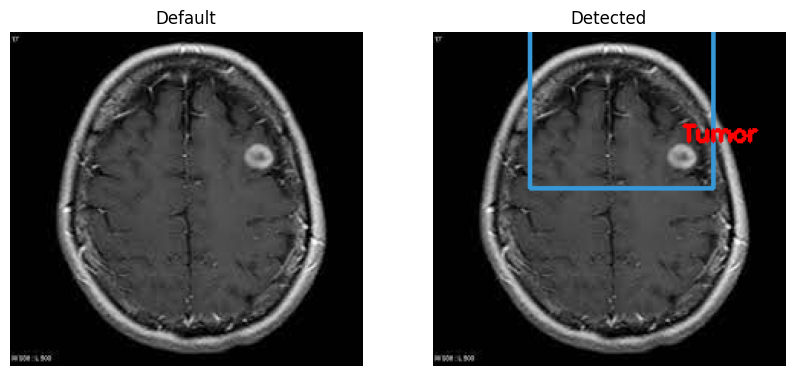

{
  "x": 163.0,
  "y": 81.5,
  "width": 20.0,
  "height": 21.0,
  "confidence": 0.42801007628440857,
  "class": "Tumor",
  "class_id": 0,
  "image_path": "./tumor_sample/sample4.jpg",
  "prediction_type": "ObjectDetectionModel"
}


In [40]:
image_path = "./tumor_sample/sample4.jpg"
image = cv2.imread(image_path)

# Perform object detection
prediction = model.predict(image_path)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Default")

# Display the detected objects
for item in prediction:
    x, y, w, h = map(int, (item["x"], item["y"], item["width"], item["height"]))
    class_label = item["class"]

    # Draw a rectangle around the detected object
    color = tuple(np.random.randint(0, 256, 3).tolist())
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    # Add a text label
    cv2.putText(image, class_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with a detected object
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected")

plt.show()

# Print the detected object
for item in prediction:
    print(item)